<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Correlation_results_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation of a method for output matching correlation - Cosine Similaritiy and Jaccard Similarity

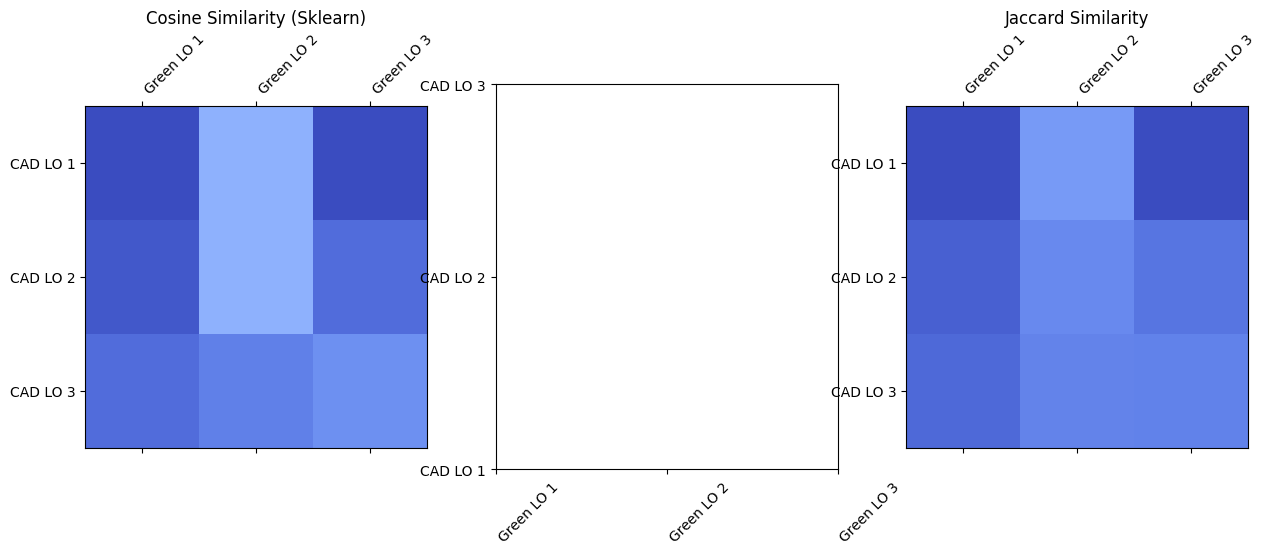


Cosine Similarity (Sklearn):
[[0.         0.2566675  0.        ]
 [0.02829698 0.25695827 0.07517471]
 [0.07632629 0.12232554 0.1636575 ]]

Jaccard Similarity:
[[0.         0.19047619 0.        ]
 [0.05       0.14814815 0.0952381 ]
 [0.06666667 0.13043478 0.125     ]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import cosine

# Define learning outcomes
cad_outcomes = [
    "Ability to use the necessary AutoCAD drawing techniques",
    "Knowing how to prepare a drawing, and form it according to the rules of the ISO standard",
    "Ability to process and convert drawings for transmission and presentation"
]

green_outcomes = [
    "Competence in sustainable practices and renewable technologies",
    "Emphasis on energy saving and optimisation of resource use, the ability to cope with the consequences of climate change",
    "Organisation and optimisation of processes for effective waste management"
]

# Combine all outcomes
all_outcomes = cad_outcomes + green_outcomes

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_outcomes)

# Compute cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix[:3], tfidf_matrix[3:]) # Changed from [:2] to [:3] and [2:] to [3:] to include all 3 CAD outcomes



# Adjusted loop to iterate over all 3 CAD outcomes
cosine_similaritiy = [] #Re-initialize the list
for i in range(3):  # Changed from range(2) to range(3)
    for j in range(3):
        vec1 = tfidf_matrix[i].toarray()[0]
        vec2 = tfidf_matrix[j+3].toarray()[0]
        #cosine_similarity = 1 - cosine(vec1, vec2) #This line is likely to cause the issue, replaced with next line
        sim = 1 - cosine(vec1, vec2) #Calculate cosine similarity and store in 'sim'
        cosine_similaritiy.append(sim) #Append the similarity value to the list

# Convert manual results to matrix
cosine_similarity_matrix = np.array(cosine_similaritiy).reshape(3, 3) # Reshape is now correct

# Compute Jaccard Similarity for verification
binary_matrix = (tfidf_matrix > 0).astype(int)
jaccard_matrix = np.zeros((3, 3))
for i in range(3): # Changed from range(2) to range(3)
    for j in range(3): # Changed from range(2) to range(3)
        jaccard_matrix[i, j] = jaccard_score(binary_matrix[i].toarray()[0], binary_matrix[j+3].toarray()[0])

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cmap = 'coolwarm'

# Plot Cosine Similarity (Sklearn)
axes[0].matshow(similarity_matrix, cmap=cmap, vmin=0, vmax=1)
axes[0].set_title("Cosine Similarity (Sklearn)")


# Plot Jaccard Similarity
axes[2].matshow(jaccard_matrix, cmap=cmap, vmin=0, vmax=1)
axes[2].set_title("Jaccard Similarity")

for ax in axes:
    ax.set_xticks(range(len(green_outcomes)))
    ax.set_yticks(range(len(cad_outcomes)))
    ax.set_xticklabels([f'Green LO {i+1}' for i in range(len(green_outcomes))], rotation=45, ha="left")
    ax.set_yticklabels([f'CAD LO {i+1}' for i in range(len(cad_outcomes))])

plt.show()

# Print similarity scores
print("\nCosine Similarity (Sklearn):")
print(similarity_matrix)

print("\nJaccard Similarity:")
print(jaccard_matrix)


Similarity matrices visualization

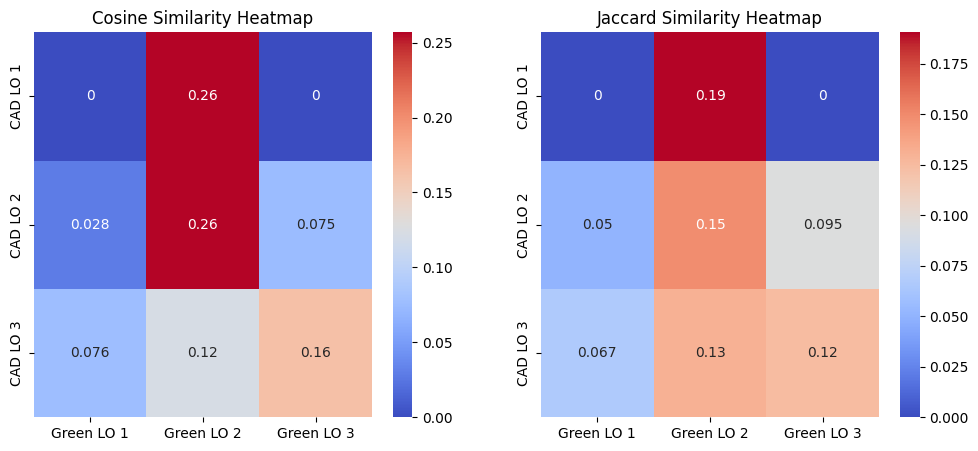

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the similarity matrices
cosine_matrix = np.array([
    [0.00, 0.2567, 0.00],  # Corrected: Comma added to separate list elements
    [0.02829, 0.2569, 0.07517],  # Corrected: Comma added to separate list elements
    [0.07639, 0.1223, 0.1636]  # Corrected: Comma added to separate list elements
])

jaccard_matrix = np.array([
    [0.00, 0.1905, 0.00],
    [0.05, 0.1481, 0.0952],
    [0.0667, 0.1304, 0.125]
])

labels_x = ['Green LO 1', 'Green LO 2', 'Green LO 3']
labels_y = ['CAD LO 1', 'CAD LO 2', 'CAD LO 3']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Cosine Similarity Heatmap
sns.heatmap(cosine_matrix, annot=True, cmap='coolwarm', xticklabels=labels_x, yticklabels=labels_y, ax=axes[0])
axes[0].set_title("Cosine Similarity Heatmap")

# Jaccard Similarity Heatmap
sns.heatmap(jaccard_matrix, annot=True, cmap='coolwarm', xticklabels=labels_x, yticklabels=labels_y, ax=axes[1])
axes[1].set_title("Jaccard Similarity Heatmap")

plt.show()


Comparison of the evaluation methods used

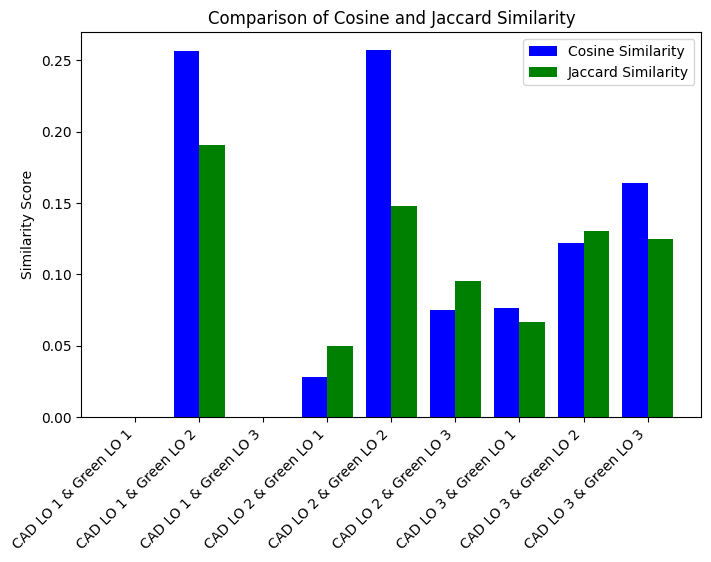

In [ ]:
# Bar chart for similarity comparisons
cad_labels = ['CAD LO 1', 'CAD LO 2', 'CAD LO 3']
green_labels = ['Green LO 1', 'Green LO 2', 'Green LO 3']

fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(cad_labels) * len(green_labels))

cosine_values = cosine_matrix.flatten()
jaccard_values = jaccard_matrix.flatten()

ax.bar(x - 0.2, cosine_values, 0.4, label='Cosine Similarity', color='blue')
ax.bar(x + 0.2, jaccard_values, 0.4, label='Jaccard Similarity', color='green')

ax.set_xticks(x)
ax.set_xticklabels([f'{c} & {g}' for c in cad_labels for g in green_labels], rotation=45, ha="right")
ax.set_ylabel('Similarity Score')
ax.set_title('Comparison of Cosine and Jaccard Similarity')
ax.legend()

plt.show()